In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_parquet("df.gzip")
df.head()

,event_time,event_type,product_id,brand,price,user_id,user_session
4,2019-10-01 00:00:04+00:00,view,1004237,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
9,2019-10-01 00:00:11+00:00,view,1004545,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb
11,2019-10-01 00:00:11+00:00,view,1005011,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101
19,2019-10-01 00:00:19+00:00,view,1005135,apple,1747.79,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
20,2019-10-01 00:00:20+00:00,view,1003306,apple,588.77,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f


In [3]:
df.shape

(27838899, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27838899 entries, 4 to 67501978
Data columns (total 7 columns):
 #   Column        Dtype              
---  ------        -----              
 0   event_time    datetime64[ns, UTC]
 1   event_type    object             
 2   product_id    int64              
 3   brand         object             
 4   price         float64            
 5   user_id       int64              
 6   user_session  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 1.7+ GB


In [6]:
df.head()

,event_time,event_type,product_id,brand,price,user_id,user_session
4,2019-10-01 00:00:04+00:00,view,1004237,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
9,2019-10-01 00:00:11+00:00,view,1004545,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb
11,2019-10-01 00:00:11+00:00,view,1005011,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101
19,2019-10-01 00:00:19+00:00,view,1005135,apple,1747.79,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
20,2019-10-01 00:00:20+00:00,view,1003306,apple,588.77,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f


In [5]:
df.tail()

,event_time,event_type,product_id,brand,price,user_id,user_session
67501950,2019-11-30 23:59:47+00:00,view,1003911,samsung,177.10,578678977,fc4e8bda-1545-4ed3-aec2-df7805c03d0d
67501966,2019-11-30 23:59:54+00:00,view,1005174,samsung,591.75,579969525,180a7f1f-ed0c-485a-b145-a980716d6abb
67501967,2019-11-30 23:59:54+00:00,view,1005118,apple,925.47,579969045,ee246970-62cb-4105-a049-703cdaee3a26
67501976,2019-11-30 23:59:59+00:00,view,1004833,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501978,2019-11-30 23:59:59+00:00,view,1004233,apple,1312.52,579969851,90aca71c-ed8a-4670-866a-761ebacb732d


In [8]:
# 중복 데이터 제거 drop_duplicates
# 깊은 복사
df = df.drop_duplicates().copy()
df.shape

(27779379, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27779379 entries, 4 to 67501978
Data columns (total 7 columns):
 #   Column        Dtype              
---  ------        -----              
 0   event_time    datetime64[ns, UTC]
 1   event_type    object             
 2   product_id    int64              
 3   brand         object             
 4   price         float64            
 5   user_id       int64              
 6   user_session  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 1.7+ GB


In [10]:
# 중복 제거된 데이터 파일 저장
df.to_parquet("df_smartphone_all.gzip", compression='gzip')

In [11]:
df[df.duplicated(keep=False)].sort_values(["user_id"]).head(5)

,event_time,event_type,product_id,brand,price,user_id,user_session


# RFM: 5G, 9G data 스마트폰 구매자
- Recency - 거래의 최근성: 고객이 얼마나 최근에 구입했는가?
- Frequency - 거래빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했나?
- Monetary - 거래규모: 고객이 구입했던 총 금액은 어느 정도인가?

In [12]:
df_rfm = df[["event_time", "event_type", "price", "user_id"]]
df_rfm

,event_time,event_type,price,user_id
4,2019-10-01 00:00:04+00:00,view,1081.98,535871217
9,2019-10-01 00:00:11+00:00,view,566.01,537918940
11,2019-10-01 00:00:11+00:00,view,900.64,530282093
19,2019-10-01 00:00:19+00:00,view,1747.79,535871217
20,2019-10-01 00:00:20+00:00,view,588.77,555446831
...,...,...,...,...
67501950,2019-11-30 23:59:47+00:00,view,177.10,578678977
67501966,2019-11-30 23:59:54+00:00,view,591.75,579969525
67501967,2019-11-30 23:59:54+00:00,view,925.47,579969045
67501976,2019-11-30 23:59:59+00:00,view,167.03,557794415


In [13]:
# 구매한 고객만 추출하기
df_pc = df_rfm[df_rfm["event_type"] == 'purchase']
df_pc = df_pc.reset_index()
df_pc = df_pc.drop("index", axis=1)

,index,event_time,event_type,price,user_id
0,162,2019-10-01 00:02:14+00:00,purchase,130.76,543272936
1,308,2019-10-01 00:04:37+00:00,purchase,642.69,551377651
2,618,2019-10-01 00:10:08+00:00,purchase,515.67,524325294
3,860,2019-10-01 00:14:14+00:00,purchase,463.31,555083442
4,1558,2019-10-01 02:19:10+00:00,purchase,736.18,515246296
...,...,...,...,...,...
720022,67501637,2019-11-30 23:57:30+00:00,purchase,346.70,547804983
720023,67501716,2019-11-30 23:58:08+00:00,purchase,235.60,574868869
720024,67501725,2019-11-30 23:58:14+00:00,purchase,346.70,547804983
720025,67501745,2019-11-30 23:58:22+00:00,purchase,1437.02,515582054


In [17]:
df_pc = df_pc.drop("event_type", axis=1)
display(df_pc.info())
df_pc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720027 entries, 0 to 720026
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   event_time  720027 non-null  datetime64[ns, UTC]
 1   price       720027 non-null  float64            
 2   user_id     720027 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 16.5 MB


None

,event_time,price,user_id
0,2019-10-01 00:02:14+00:00,130.76,543272936
1,2019-10-01 00:04:37+00:00,642.69,551377651
2,2019-10-01 00:10:08+00:00,515.67,524325294
3,2019-10-01 00:14:14+00:00,463.31,555083442
4,2019-10-01 02:19:10+00:00,736.18,515246296


In [18]:
# 최근 주문일 구하기
last_timestamp = df_pc["event_time"].max() + dt.timedelta(days=1)
last_timestamp

Timestamp('2019-12-01 23:58:57+0000', tz='UTC')

In [19]:
# 고객별 Recency, Frequency, Monetary 값 구하기
# Recency : 최근 거래 기준일(last_timestamp)과 고객별 최근 구매한 날짜(x.max())와 차이값
# Frequency : 구매 빈도수
# Monetary : 총 구매 금액
# 하나의 함수를 가지고 특정 행이나 데이터에만 동일하게 전처리를 해주고 싶을 때 Lambda를 사용해서 값을 계산할 수 있다
# 최근 마지막 거래일과 해당 고객의 마지막 거래일의 차이를 구하기 위하여 lambda 함수 사용한다.
RFM = df_pc.groupby("user_id").agg({"event_time" : lambda x : (last_timestamp - x.max()).days,
                                   "price":["count", "sum"]})
RFM.head()

event_time price         
            <lambda> count      sum
user_id                            
299358698         22     1   154.19
304707635         18     1  2007.52
307138432         23     1   106.57
315835876          7     1   169.89
366237542         12     1   126.90

In [20]:
RFM.columns = ["Recency", "Frequency", "MonetaryValue"]
display(RFM.head())
RFM.tail()

,Recency,Frequency,MonetaryValue
user_id,,,
299358698,22,1,154.19
304707635,18,1,2007.52
307138432,23,1,106.57
315835876,7,1,169.89
366237542,12,1,126.90


,Recency,Frequency,MonetaryValue
user_id,,,
579962593,1,1,121.24
579962677,1,1,1634.38
579963523,1,1,457.91
579966375,1,1,124.11
579967058,1,1,124.11


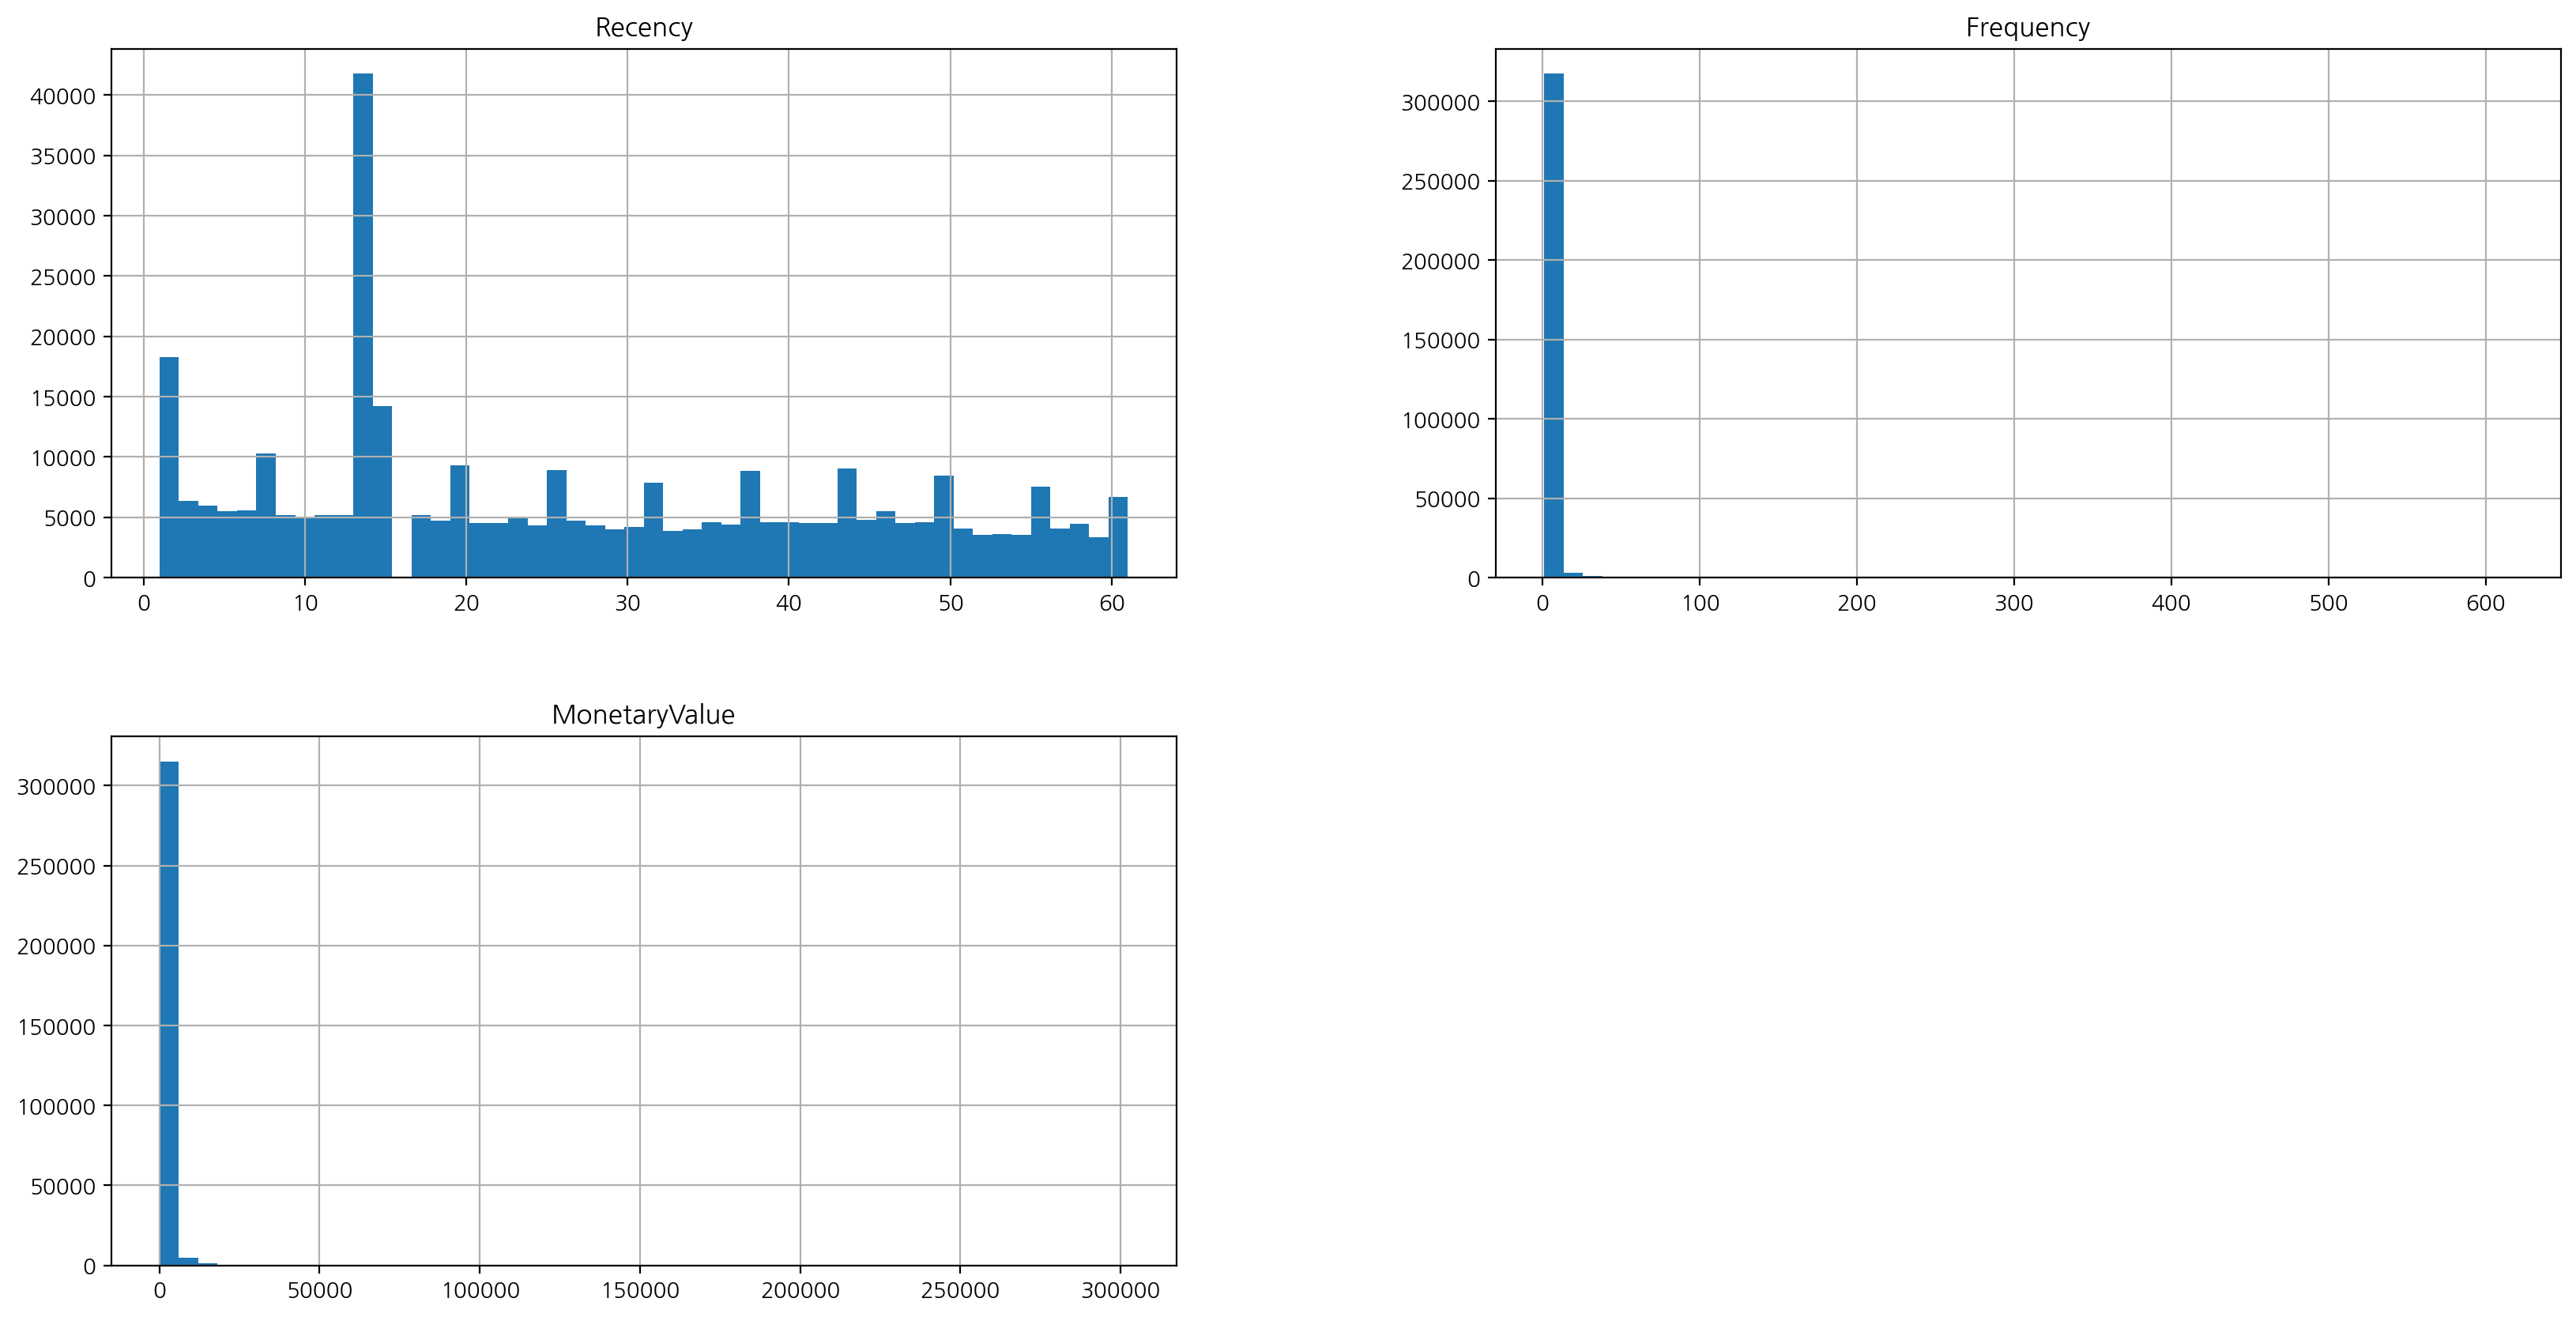

In [21]:
RFM.hist(bins=50, figsize=(20,10));

In [43]:
# qcut을 통한 RFM 변수 만들기
# Recency 는 최근일수록 높은 스코어
# Frequency, MonetaryValue 는 값이 클수록 높은 스코어
r_labels = list(range(5, 0, -1))
m_labels = list(range(1, 6))
cut_size = 5

r_cut = pd.qcut(RFM["Recency"], cut_size, labels=r_labels)
m_cut = pd.qcut(RFM["MonetaryValue"], cut_size, labels=m_labels)

In [44]:
print(RFM["Frequency"].min(), RFM["Frequency"].max())

1 617


In [65]:
f_edges = [0, 2, 3, 10, 100, 617]
f_labels = list(range(1, 6))
f_cut = pd.cut(RFM["Frequency"], bins=f_edges, labels=f_labels)

In [66]:
RFM = RFM.assign(R=r_cut, F=f_cut, M=m_cut)
RFM 

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
user_id,,,,,,,,
299358698,22,1,154.19,3,1,1,311,5
304707635,18,1,2007.52,3,1,5,315,9
307138432,23,1,106.57,3,1,1,311,5
315835876,7,1,169.89,5,1,1,511,7
366237542,12,1,126.90,4,1,1,411,6
...,...,...,...,...,...,...,...,...
579962593,1,1,121.24,5,1,1,511,7
579962677,1,1,1634.38,5,1,5,515,11
579963523,1,1,457.91,5,1,3,513,9


In [67]:
# RFM_segment
RFM["RFM_segment"] = RFM["R"].astype(str) + RFM["F"].astype(str) + RFM["M"].astype(str)
RFM["RFM_segment"]

user_id
299358698    311
304707635    315
307138432    311
315835876    511
366237542    411
            ... 
579962593    511
579962677    515
579963523    513
579966375    511
579967058    511
Name: RFM_segment, Length: 321917, dtype: object

In [68]:
#  RFM Score
RFM["RFM_score"] = RFM[["R", "F", "M"]].sum(axis=1)
RFM

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
user_id,,,,,,,,
299358698,22,1,154.19,3,1,1,311,5
304707635,18,1,2007.52,3,1,5,315,9
307138432,23,1,106.57,3,1,1,311,5
315835876,7,1,169.89,5,1,1,511,7
366237542,12,1,126.90,4,1,1,411,6
...,...,...,...,...,...,...,...,...
579962593,1,1,121.24,5,1,1,511,7
579962677,1,1,1634.38,5,1,5,515,11
579963523,1,1,457.91,5,1,3,513,9


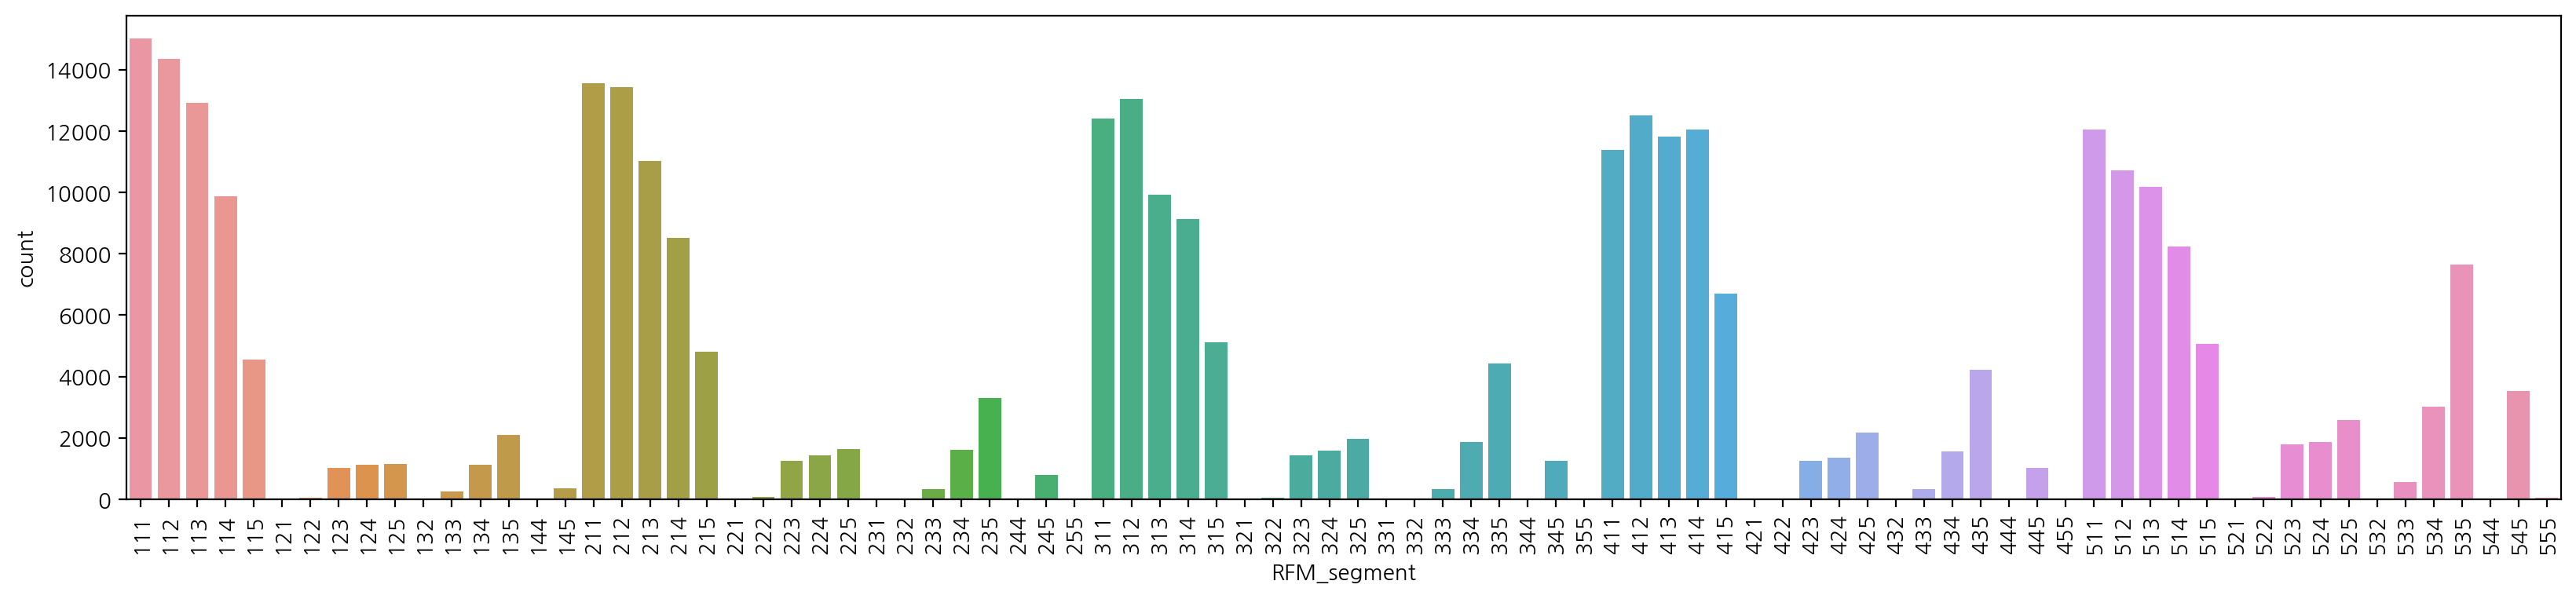

In [69]:
# RFM segment 값에 따라 정렬
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.countplot(data=RFM.sort_values("RFM_segment"), x="RFM_segment");

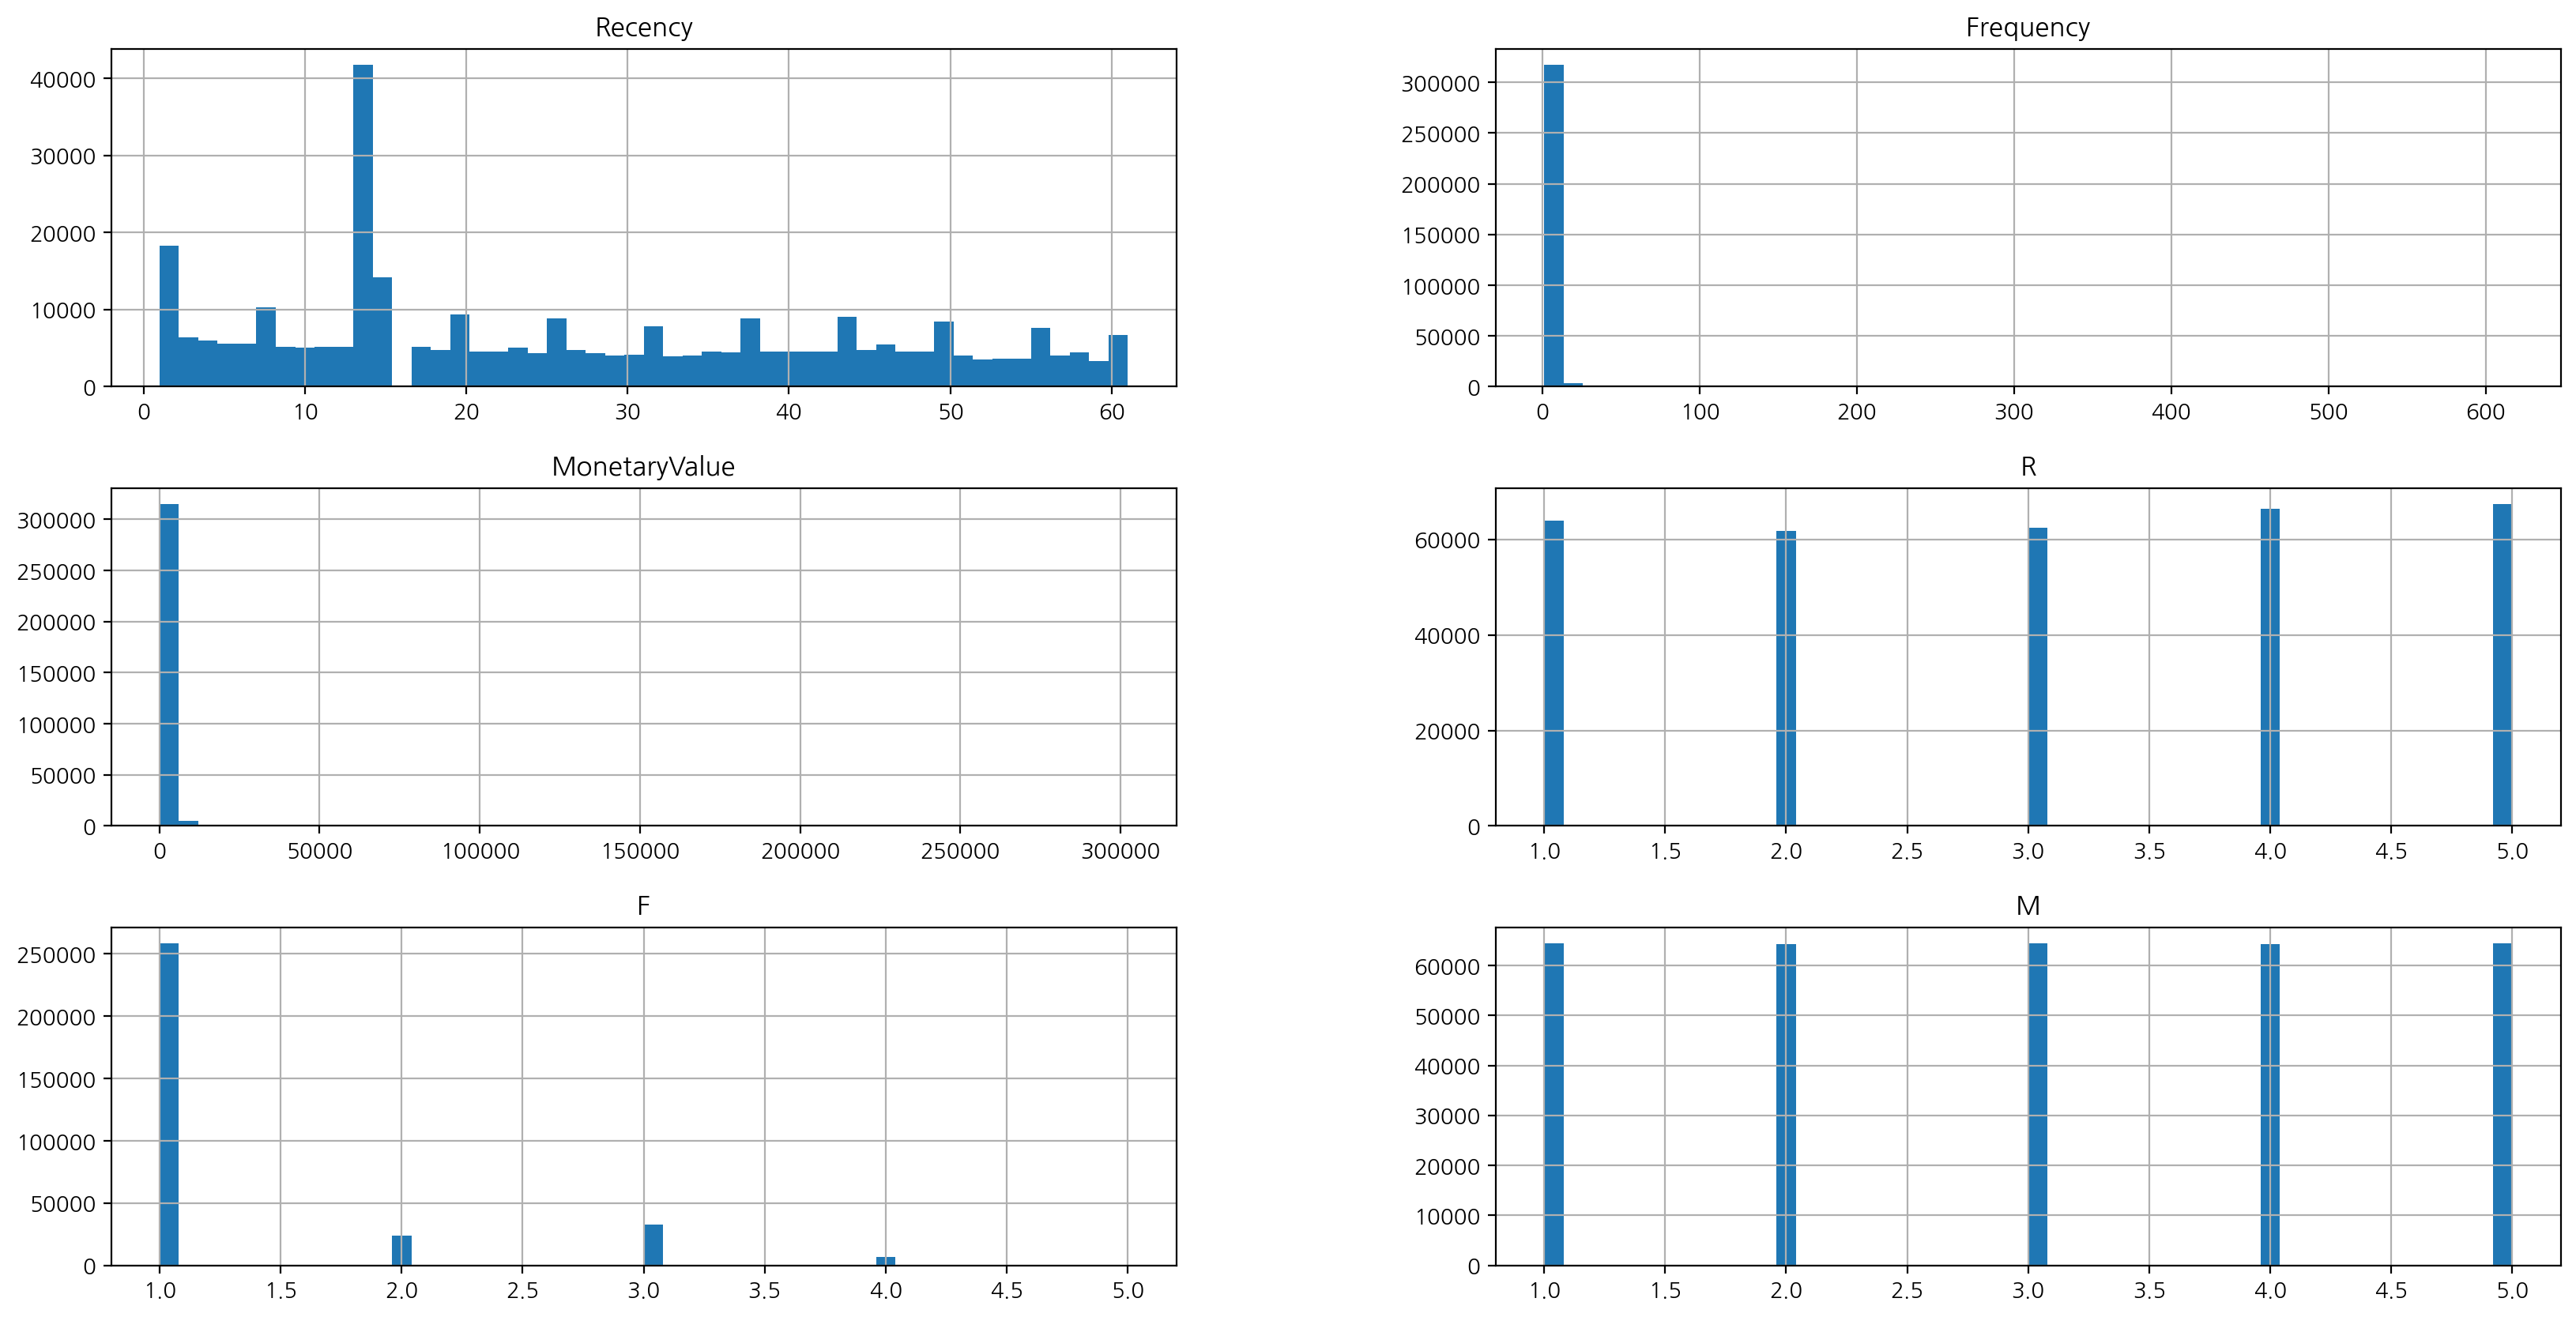

In [70]:
RFM.iloc[:, :-2].astype(float).hist(figsize=(20,10), bins=50);

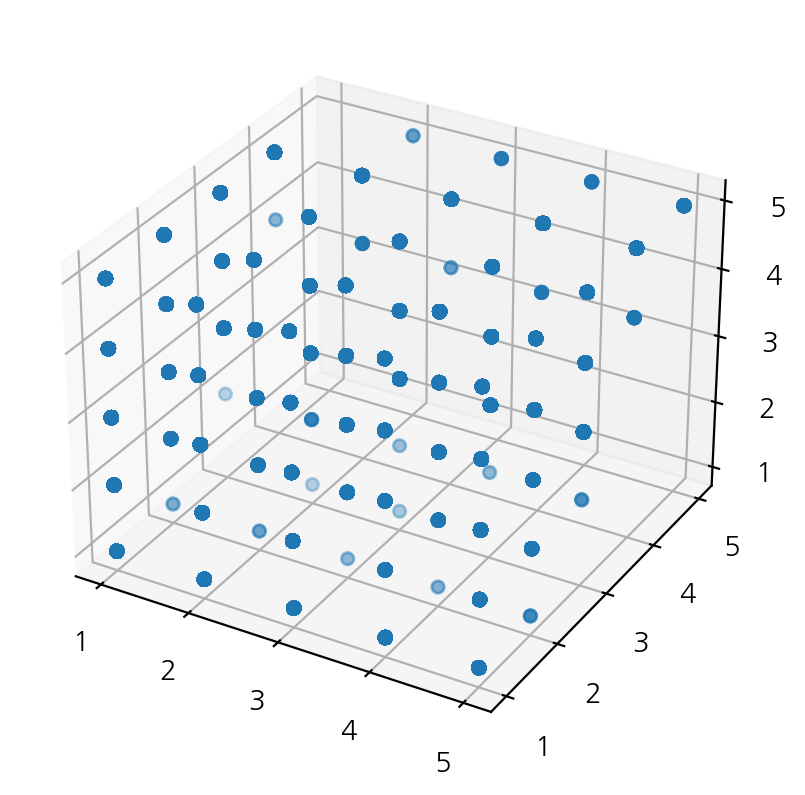

In [71]:
# 3d projection ax.scatter3D rfm["R"], rfm["F"], rfm["M"]
ax = plt.axes(projection='3d')
ax.scatter3D(RFM["R"], RFM["F"], RFM["M"]);

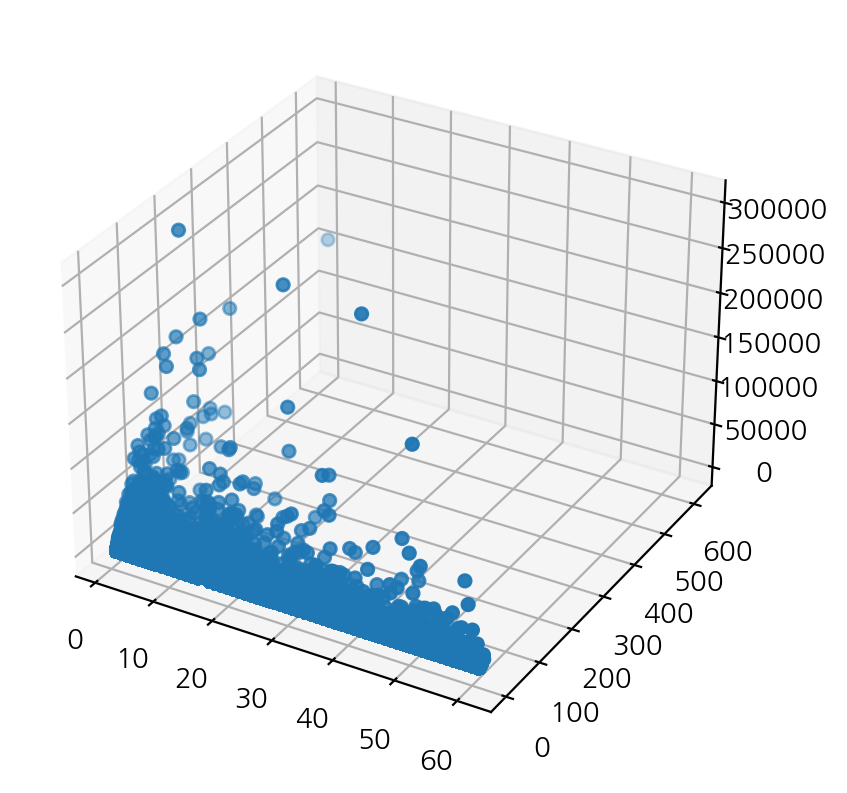

In [72]:
# rfm["Recency"], rfm["Frequency"], rfm["MonetaryValue"]
ax = plt.axes(projection='3d')
ax.scatter3D(RFM["Recency"], RFM["Frequency"], RFM["MonetaryValue"]);

In [73]:
# 문자열의 format 함수를 사용하여 소수점 아래는 표기하지 않도록({:,.0f}) 문자열 포맷을 지정
rfm_sco = RFM.groupby("RFM_score").agg({"Recency":"mean", "Frequency":"mean", 
                                        "MonetaryValue":["mean", "sum"]}).style.format("{:,.0f}")

In [74]:
rfm_sco.background_gradient()

In [75]:
# qcut 을 통해 3단계로 "silver", "gold", "platinum" 고객군을 나누기
labels = ["silver", "gold", "platinum"]
RFM["RFM_class"] = pd.qcut(RFM["RFM_score"], 3, labels)
RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
user_id,,,,,,,,,
299358698,22,1,154.19,3,1,1,311,5,silver
304707635,18,1,2007.52,3,1,5,315,9,platinum
307138432,23,1,106.57,3,1,1,311,5,silver
315835876,7,1,169.89,5,1,1,511,7,gold
366237542,12,1,126.90,4,1,1,411,6,silver


In [76]:
# RFM_score에 따라 class가 잘 나뉘어졌는지
RFM.groupby("RFM_class")["RFM_score"].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,128191.0,4.910516,1.020098,3.0,4.0,5.0,6.0,6.0
gold,92197.0,7.455188,0.497991,7.0,7.0,7.0,8.0,8.0
platinum,101529.0,10.423505,1.452062,9.0,9.0,10.0,11.0,15.0


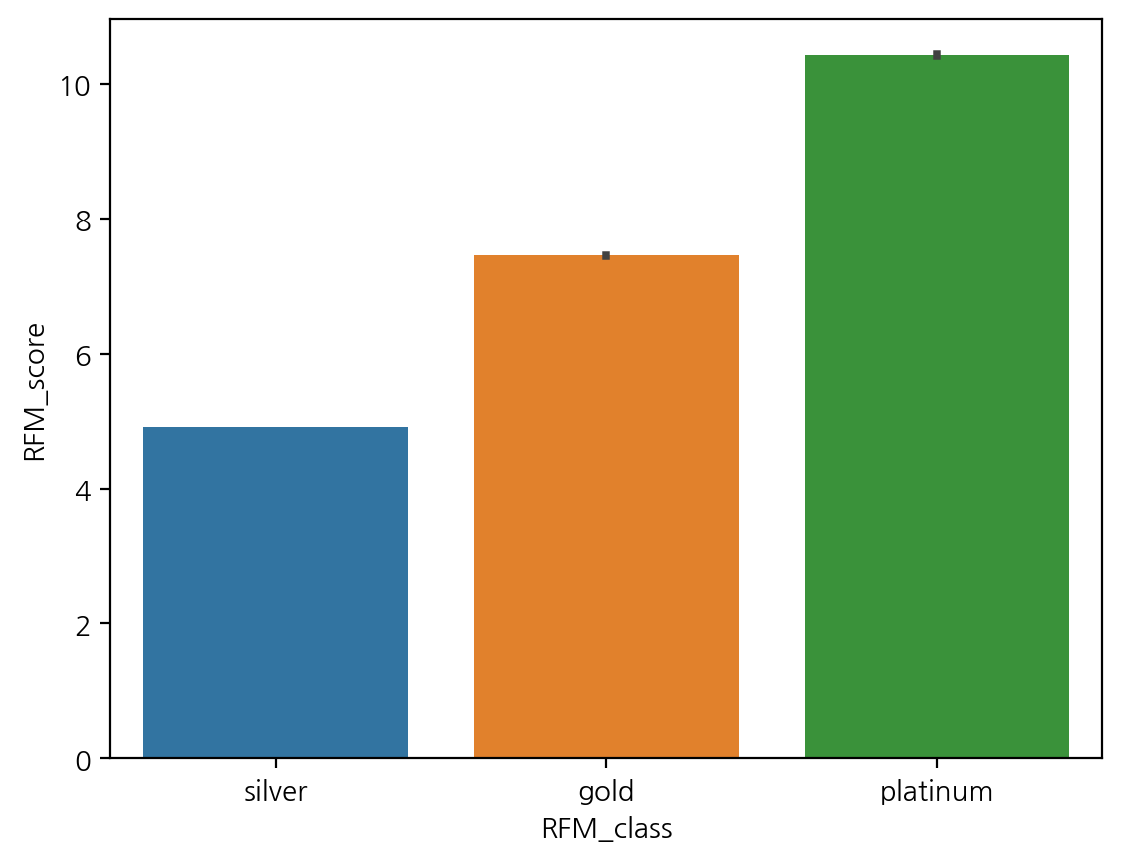

In [77]:
# barplot으로 RFM_class 별 평균 RFM_score 나타내기
sns.barplot(data=RFM, x="RFM_class", y="RFM_score");

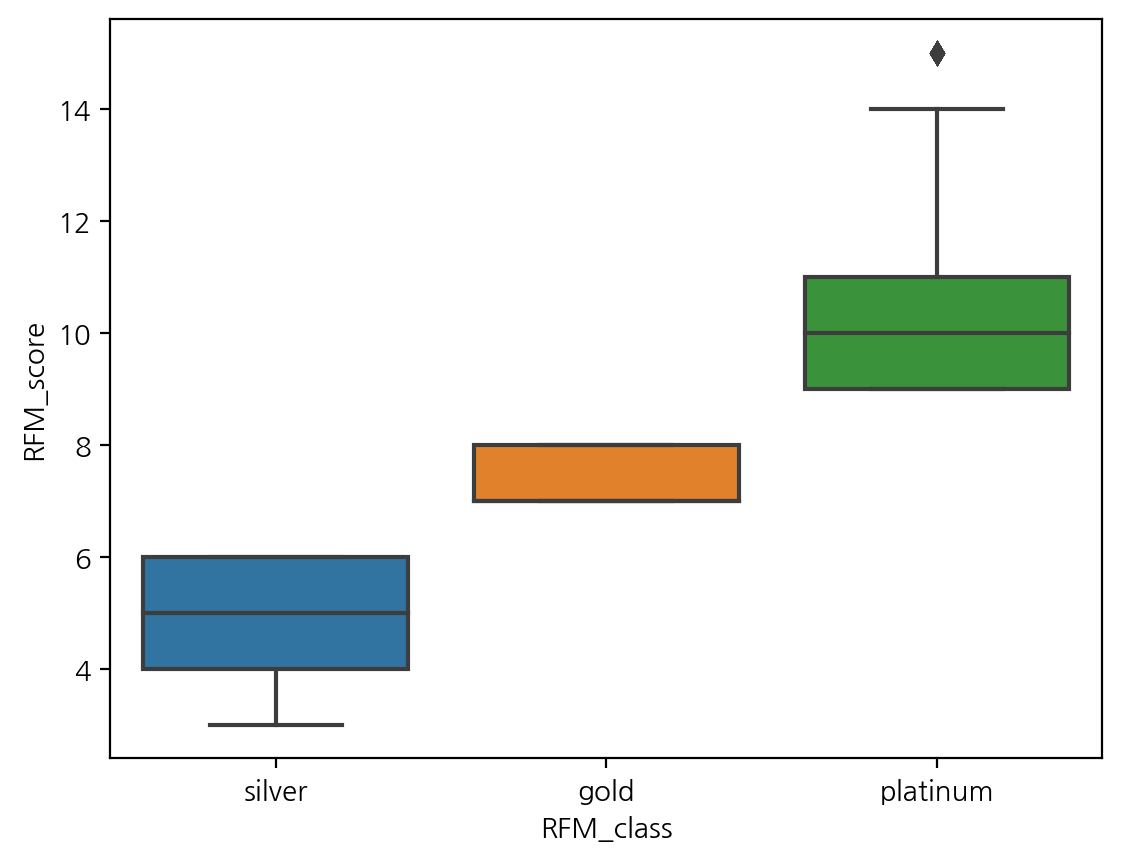

In [78]:
sns.boxplot(data=RFM, x="RFM_class", y="RFM_score");

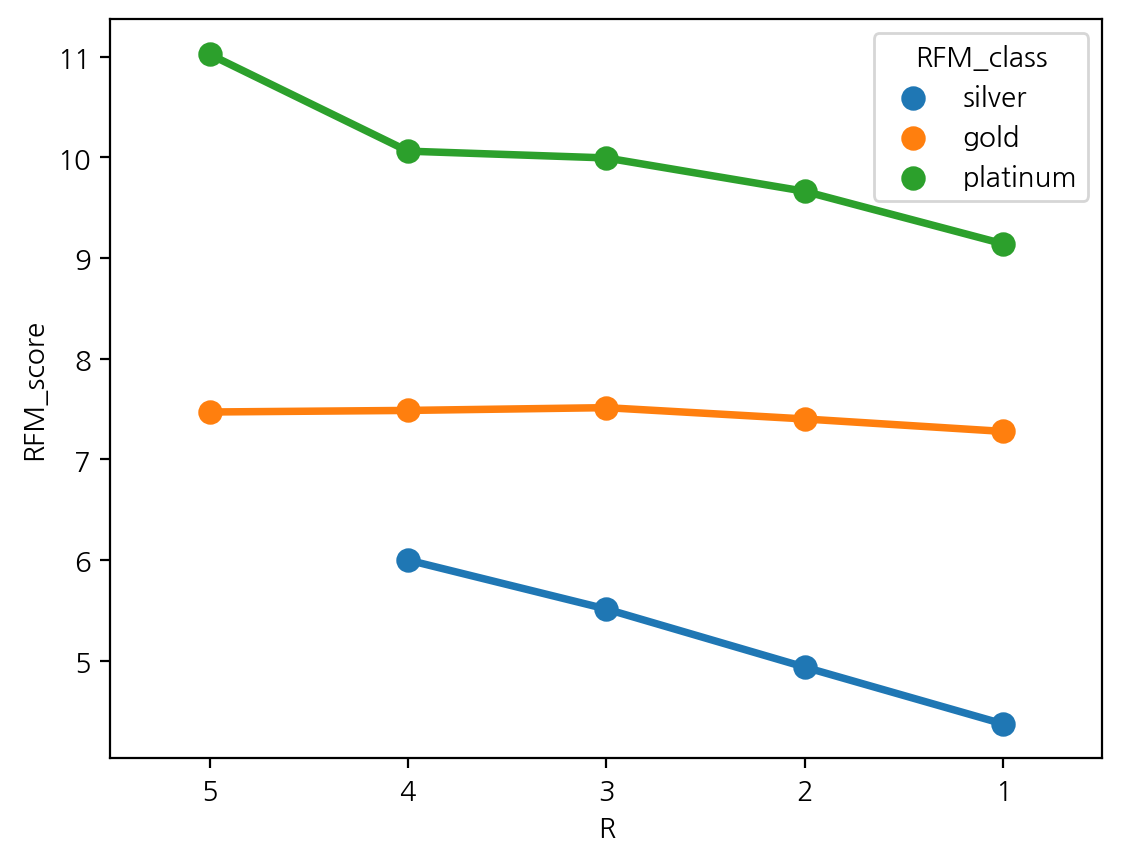

In [80]:
sns.pointplot(data=RFM, x="R", y="RFM_score", hue="RFM_class");

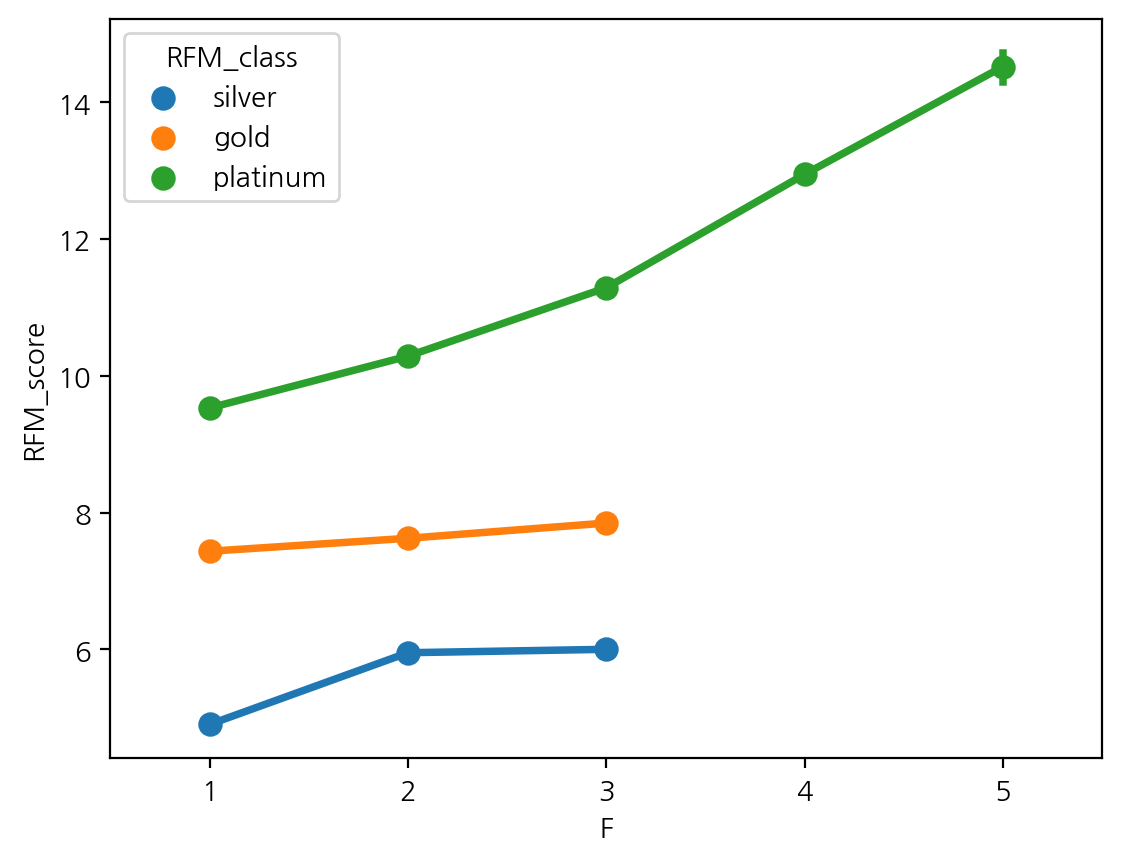

In [81]:
sns.pointplot(data=RFM, x="F", y="RFM_score", hue="RFM_class");

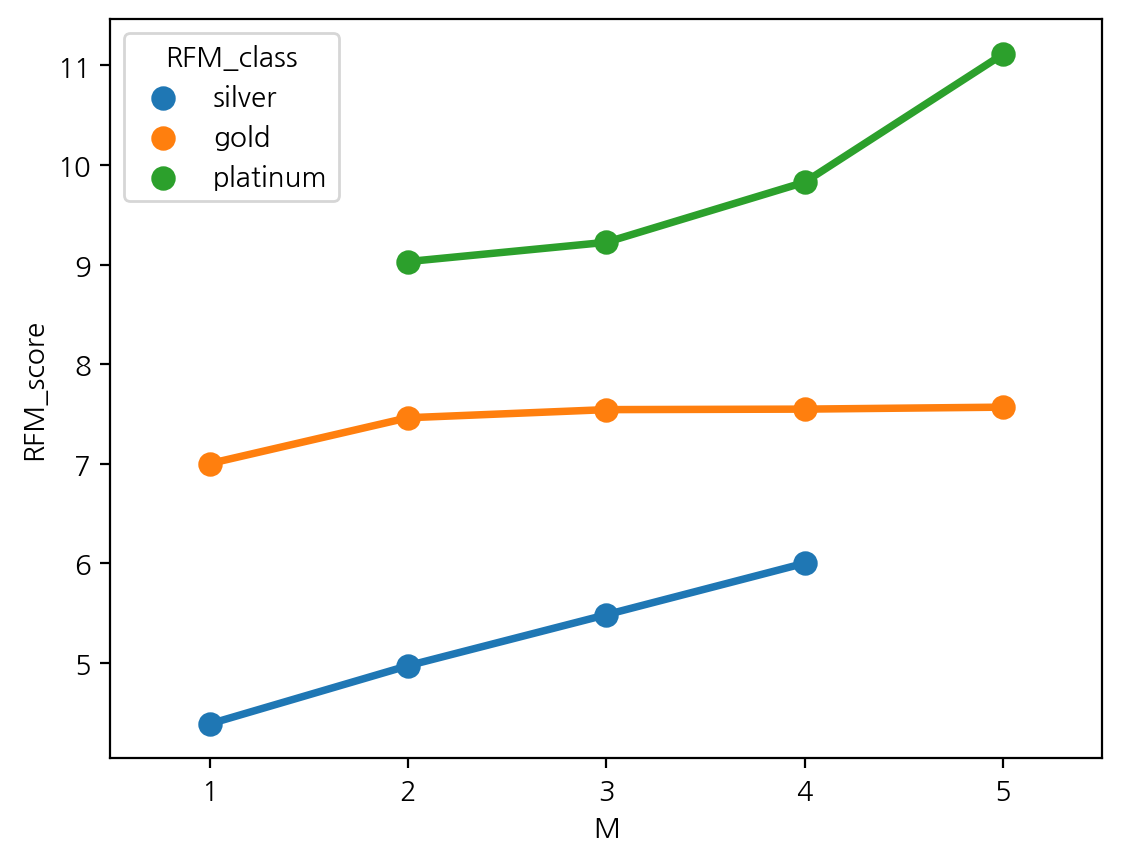

In [82]:
sns.pointplot(data=RFM, x="M", y="RFM_score", hue="RFM_class");

In [83]:
RFM.groupby("RFM_class").agg({"Recency":"mean", "Frequency":"mean", 
                              "MonetaryValue":["mean", "sum", "count"]}).round(2)

Recency Frequency MonetaryValue                      
             mean      mean          mean           sum   count
RFM_class                                                      
silver      39.71      1.15        279.86  3.587557e+07  128191
gold        22.08      1.45        609.17  5.616352e+07   92197
platinum    14.55      4.33       2387.87  2.424384e+08  101529

In [84]:
RFM.groupby("RFM_class").agg({"Recency":"mean", "Frequency":"mean", 
                              "MonetaryValue":["mean", "sum", "count"]}).style.background_gradient().format("{:,.0f}")

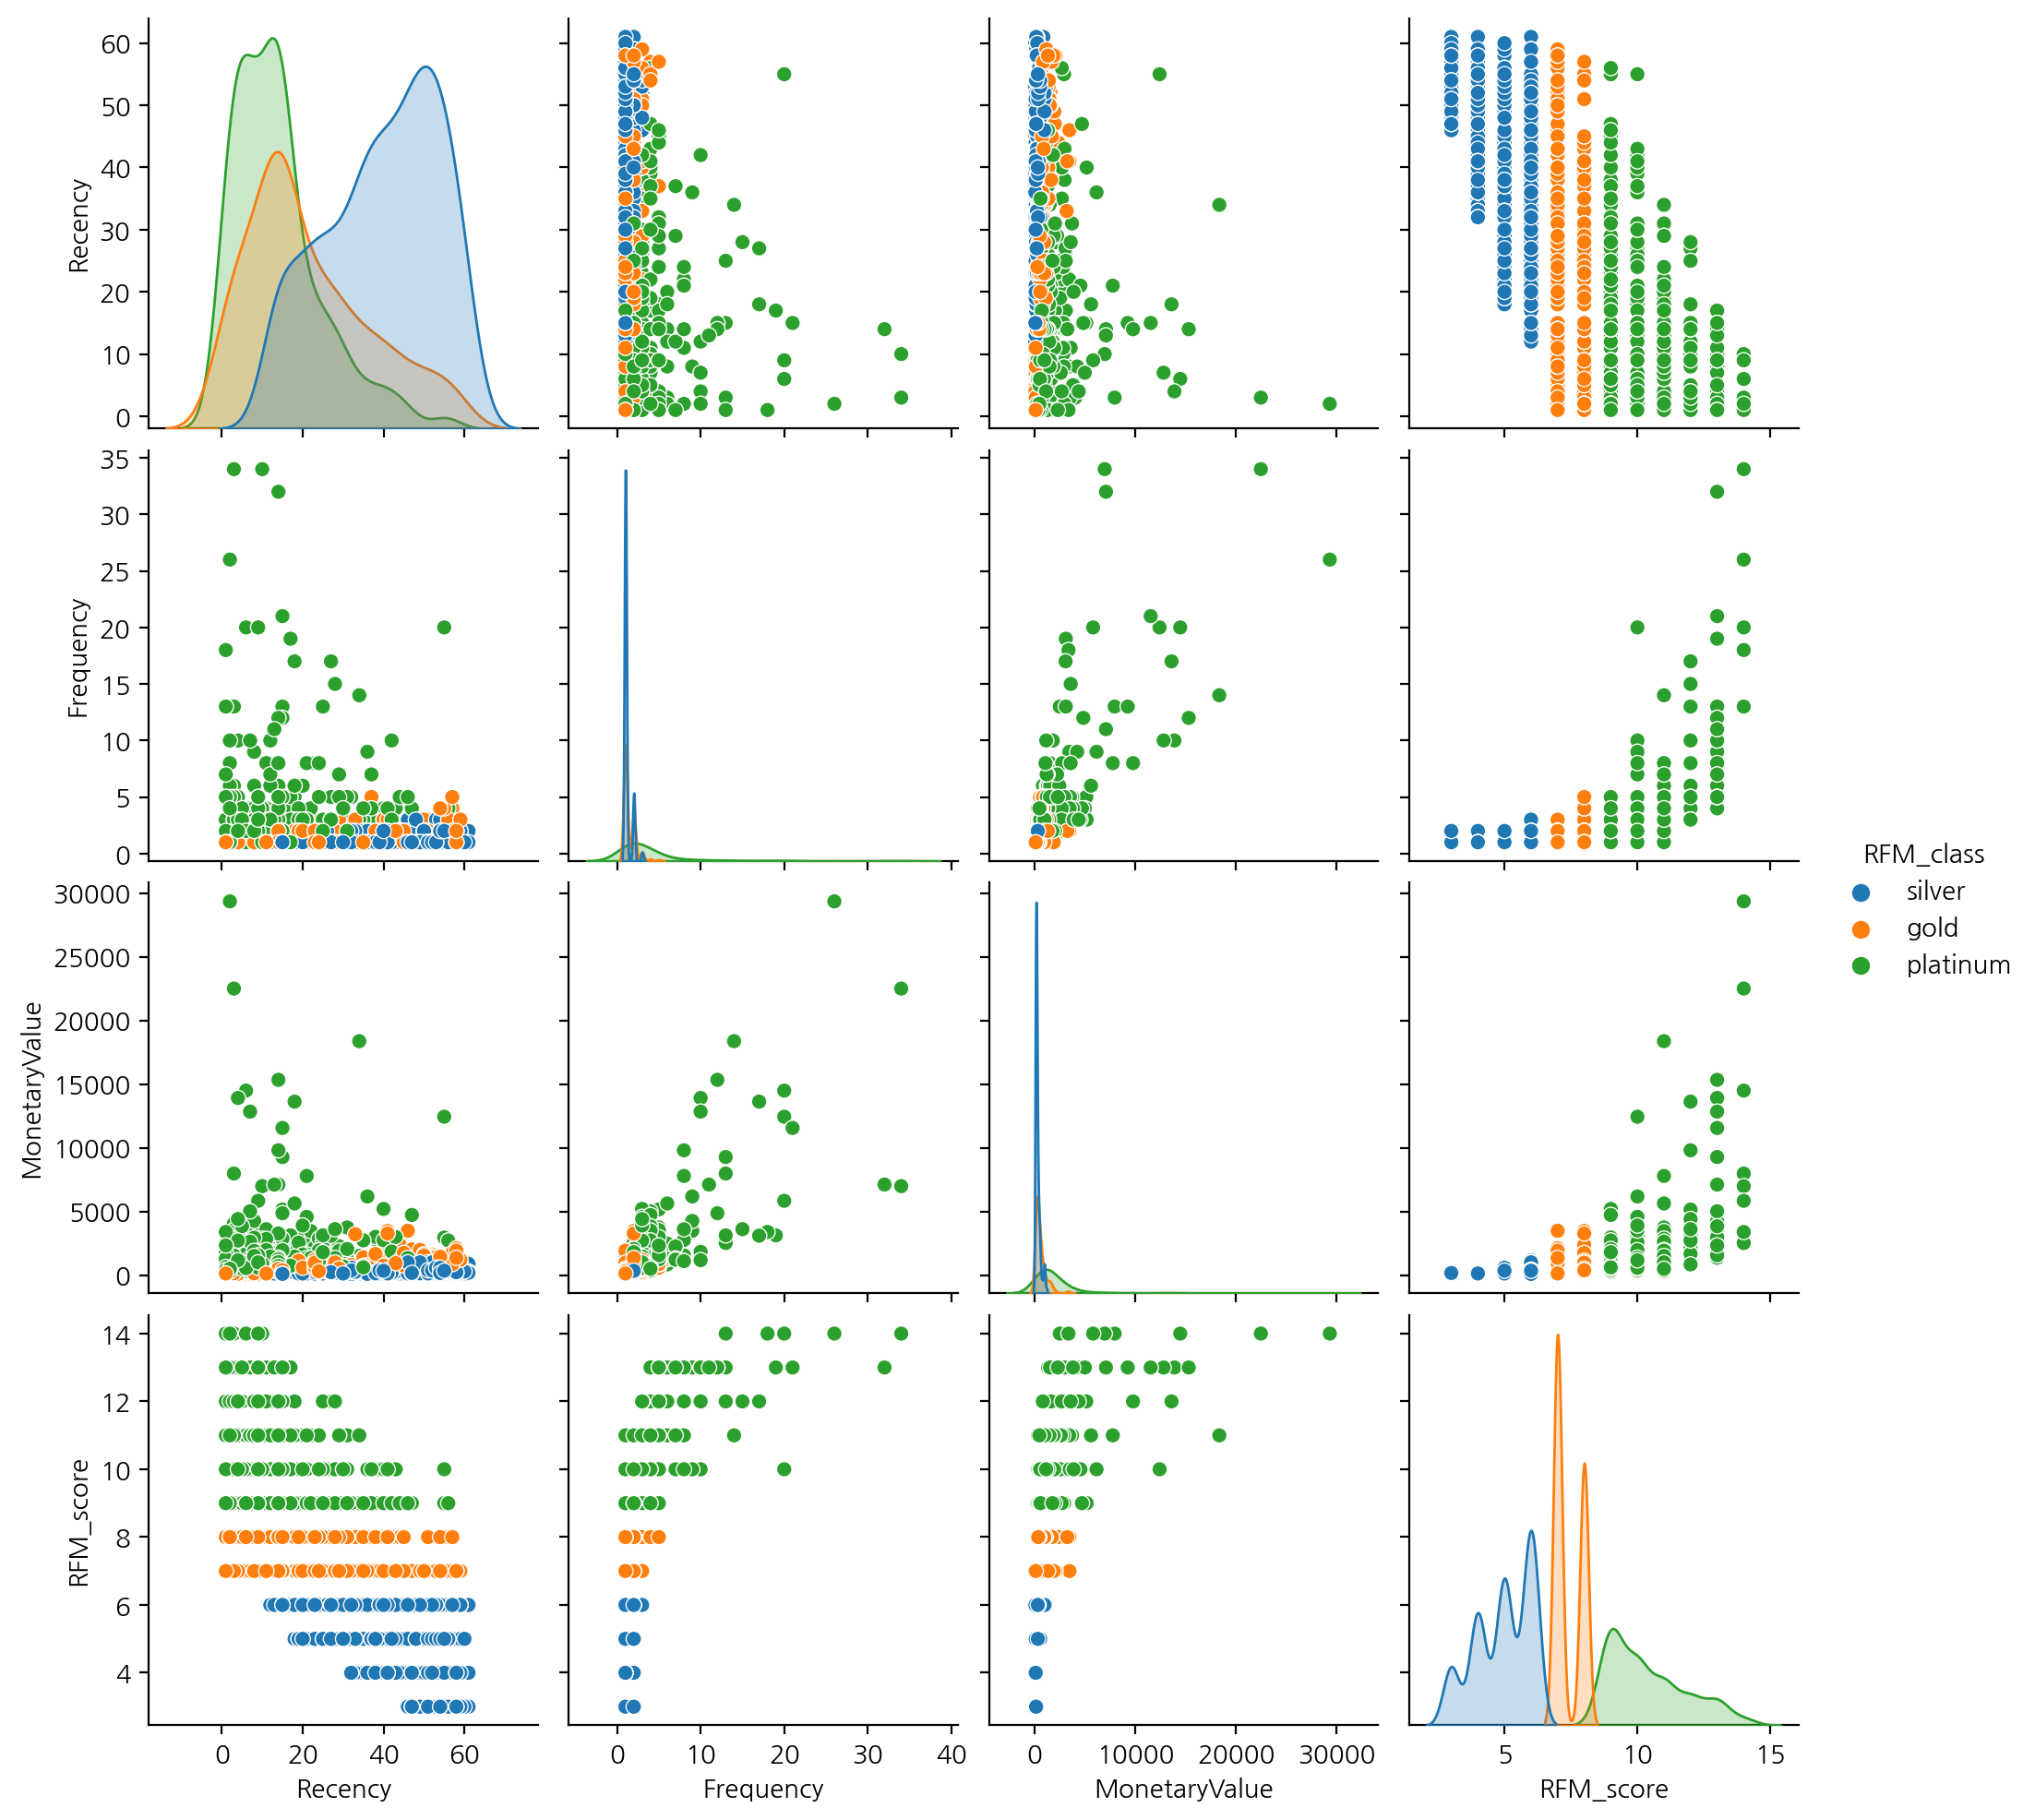

In [85]:
sns.pairplot(data=RFM.sample(1000), hue="RFM_class")

In [86]:
re_co = RFM.corr(numeric_only=True)
re_co

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.121229,-0.101278,-0.661877
Frequency,-0.121229,1.000000,0.774808,0.419760
MonetaryValue,-0.101278,0.774808,1.000000,0.403994
RFM_score,-0.661877,0.419760,0.403994,1.000000


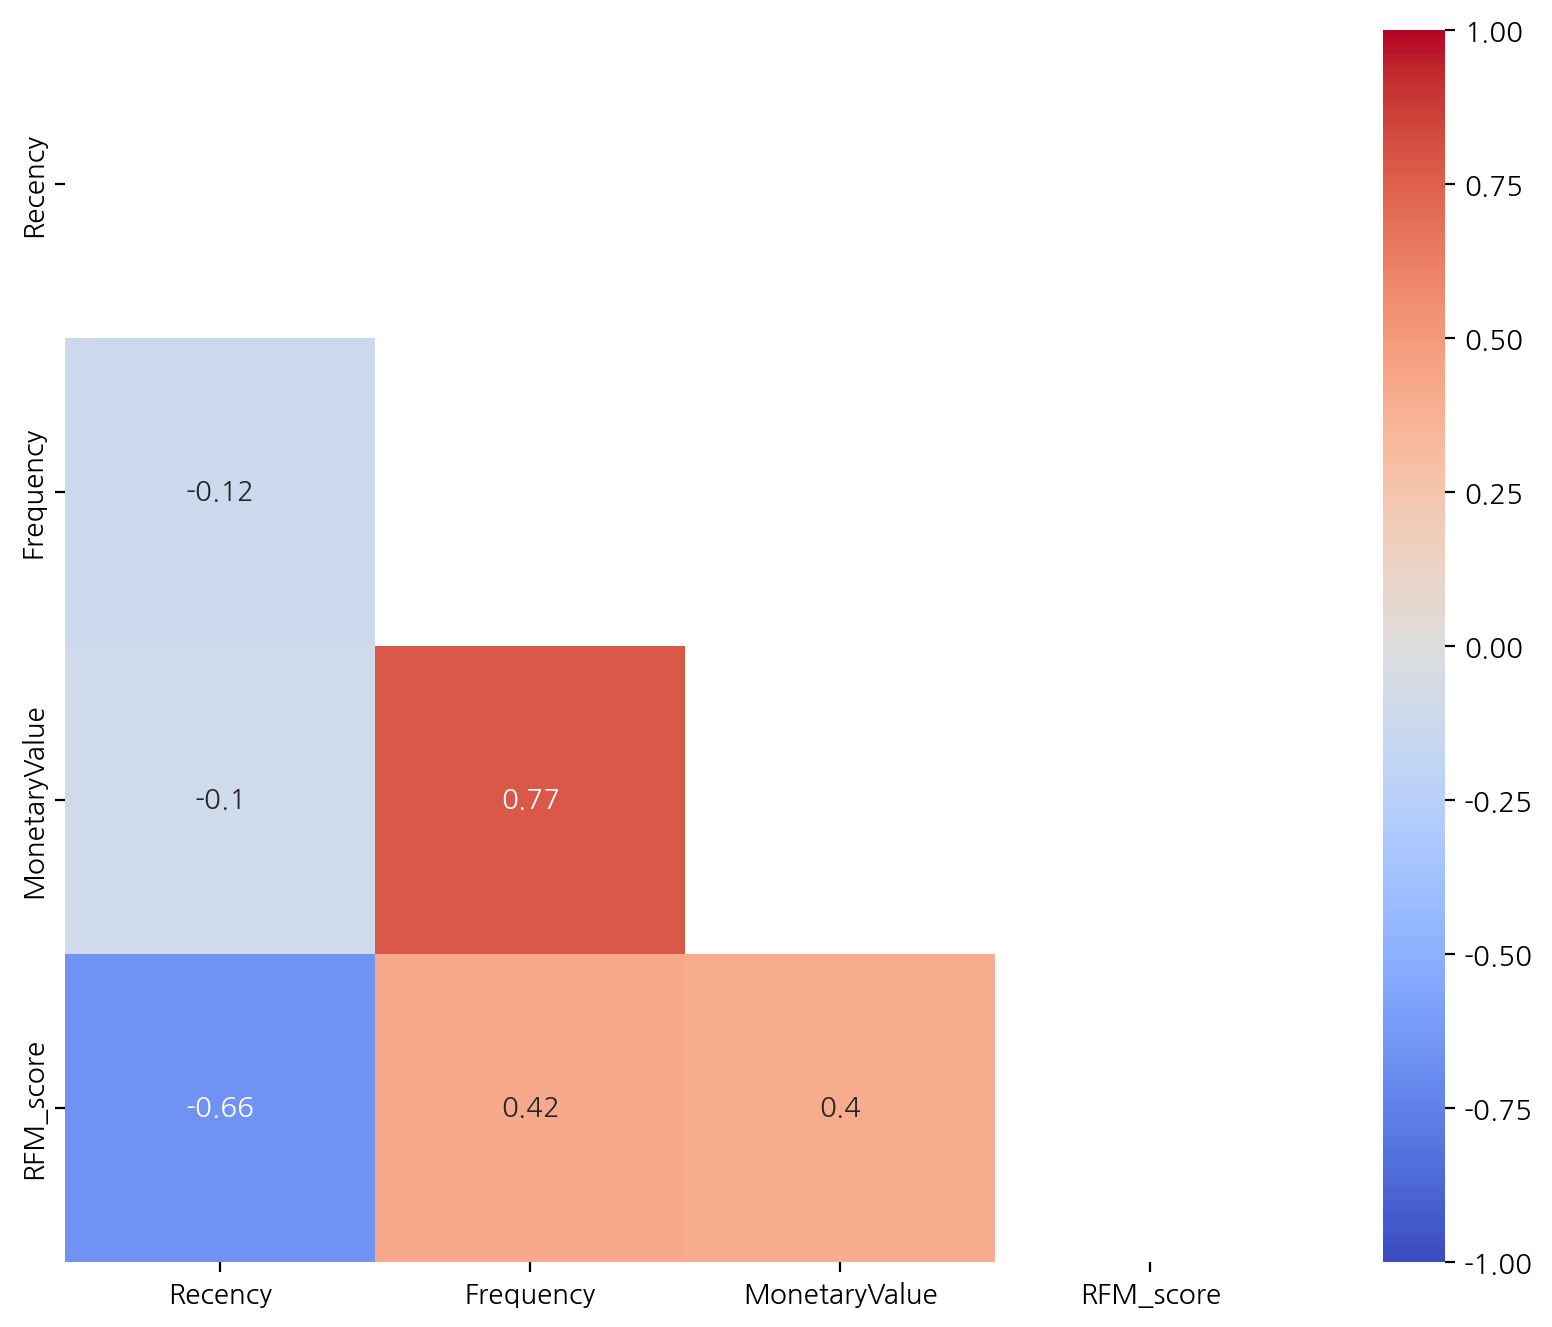

In [87]:
plt.figure(figsize=(10,8))
masku = np.triu(np.ones(re_co.corr().shape))

ax = sns.heatmap(re_co, cmap="coolwarm", annot=True, vmin=-1, vmax=1 , mask=masku);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
plt.rcParams["font.size"]=13

In [88]:
RFM.to_csv("smartphone_all_rfm.csv")

In [89]:
pd.read_csv("smartphone_all_rfm.csv")

,user_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
0,299358698,22,1,154.19,3,1,1,311,5,silver
1,304707635,18,1,2007.52,3,1,5,315,9,platinum
2,307138432,23,1,106.57,3,1,1,311,5,silver
3,315835876,7,1,169.89,5,1,1,511,7,gold
4,366237542,12,1,126.90,4,1,1,411,6,silver
...,...,...,...,...,...,...,...,...,...,...
321912,579962593,1,1,121.24,5,1,1,511,7,gold
321913,579962677,1,1,1634.38,5,1,5,515,11,platinum
321914,579963523,1,1,457.91,5,1,3,513,9,platinum
321915,579966375,1,1,124.11,5,1,1,511,7,gold
